# __Akshat Sharma 102217107__

In [2]:
%pip install opendatasets
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import opendatasets as od


In [4]:
od.download("https://www.kaggle.com/jahias/microsoft-adventure-works-cycles-customer-data")

Skipping, found downloaded files in ".\microsoft-adventure-works-cycles-customer-data" (use force=True to force download)


##Creating a dataframe and viewing the first five entries.

In [5]:
file = ("microsoft-adventure-works-cycles-customer-data/AWCustomers.csv")
df = pd.read_csv(file)
df.head()


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


(array([18291.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    70.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

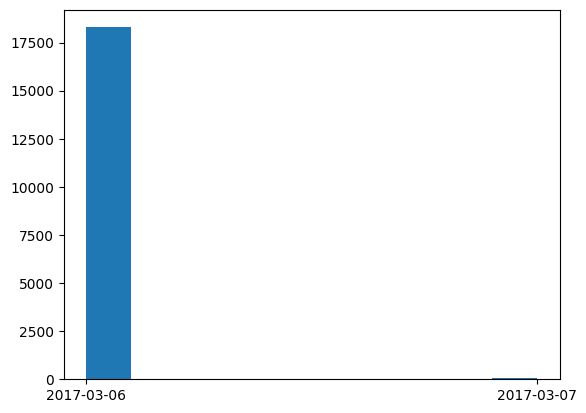

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['LastUpdated'])

In [7]:
sales_file = ("microsoft-adventure-works-cycles-customer-data/AWSales.csv")
df_sales = pd.read_csv(sales_file)
df_sales.head()


,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


## What does the title column represent?

In [8]:
# df.size
print(df.shape[0])
df_not_null_title = df[pd.notnull(df["Title"])]
df_not_null_title.head()
df.columns

18361


Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated'],
      dtype='object')

# __Analysis of Features for Selection__
##    1. CustomerID is essential as it connects both the csvs
##    2. BirthDate can be used to acquire the age of a certain person which can be useful for predicting the age groups that buy cycles the most.
##    3. NumberChildrenAtHome is more important than TotalChildren as it is more likely for children at home to receive the cycle as a present
##    4. Yearly Income is crucial whereas LastUpdated is not as important.
**********************************************************************
## 1. Title is not useful as gender can provide the same information and gender itself is also not useful in determining the buying probability.
## 2. The 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName','CountryRegionName', 'PostalCode', 'PhoneNumber'. does not matter either as it doesn't reveal the customers' willingness to buy a certain commodity.
## 3. Education and Occupation do not matter as much either
## 4. MaritalStatus, HomeOwnerFlag does not matter


In [9]:
dropped_features = [ 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber','Occupation','Education',
        'Gender', 'MaritalStatus', 'HomeOwnerFlag',
        'TotalChildren',
        'LastUpdated']

df_sf = df.drop(columns=dropped_features)
df_sf.head()

,CustomerID,BirthDate,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome
0,21173,1987-11-13,3,0,81916
1,13249,1972-07-21,2,1,81076
2,29350,1985-11-09,3,0,86387
3,13503,1977-10-18,2,1,61481
4,22803,1975-02-05,1,0,51804


## CustomerID: Discrete Interval
## BikerBuyer: Discrete Binary
## NumberCarsOwned: Discrete Ratio
## NumberChildrenAtHome: Discrete Ratio
## YearlyIncome: Discrete Ratio
## AvgMonthSpend: Continuous Ratio
## BirthDate: Discrete Interval

In [10]:
df_joined = pd.merge(df_sf,df_sales,on='CustomerID')
df_joined.head()

,CustomerID,BirthDate,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend
0,21173,1987-11-13,3,0,81916,1,50.97
1,13249,1972-07-21,2,1,81076,1,53.11
2,29350,1985-11-09,3,0,86387,1,54.08
3,13503,1977-10-18,2,1,61481,1,56.93
4,22803,1975-02-05,1,0,51804,1,55.41


18361


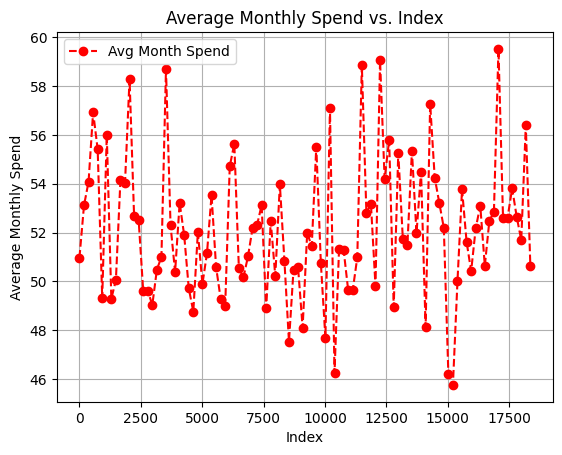

In [11]:
import numpy as np
print(len(df_joined['AvgMonthSpend']))
range = np.linspace(start=0,stop=18360, num=100)
plt.plot(range, df_joined['AvgMonthSpend'].head(100), color='red', linestyle='dashed', marker='o', label='Avg Month Spend')
plt.xlabel('Index')
plt.ylabel('Average Monthly Spend')
plt.title('Average Monthly Spend vs. Index')
plt.legend()
plt.grid(True)
plt.show()

# __Dealing With NULL values__


In [12]:
df_joined.isna().sum()


CustomerID              0
BirthDate               0
NumberCarsOwned         0
NumberChildrenAtHome    0
YearlyIncome            0
BikeBuyer               0
AvgMonthSpend           0
dtype: int64

# __Normalization__

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data_ams = scaler.fit_transform(df_joined[['AvgMonthSpend']])
scaled_data_yi = scaler.fit_transform(df_joined[['YearlyIncome']])
df_joined['AvgMonthSpend'] = scaled_data_ams.flatten()
df_joined['YearlyIncome'] = scaled_data_yi.flatten()


In [14]:
df_joined.head()

,CustomerID,BirthDate,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend
0,21173,1987-11-13,3,0,0.496842,1,0.324210
1,13249,1972-07-21,2,1,0.489453,1,0.425201
2,29350,1985-11-09,3,0,0.536172,1,0.470977
3,13503,1977-10-18,2,1,0.317083,1,0.605474
4,22803,1975-02-05,1,0,0.231958,1,0.533742


# __Converting the Birth Date Column to extract the age of customers__

In [15]:
import datetime

def calculate_age_in_years(birth_date):
  born = datetime.datetime.strptime(birth_date, "%Y-%m-%d")
  today = datetime.date.today()
  age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  return age

df_joined['Age'] = df_joined['BirthDate'].apply(calculate_age_in_years)
scaler = MinMaxScaler()
df_joined['Age'] = scaler.fit_transform(df_joined[['Age']])
df_joined.drop(columns = ['BirthDate', 'CustomerID'], inplace=True)
df_joined.head()

,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,3,0,0.496842,1,0.324210,0.183099
1,2,1,0.489453,1,0.425201,0.408451
2,3,0,0.536172,1,0.470977,0.211268
3,2,1,0.317083,1,0.605474,0.323944
4,1,0,0.231958,1,0.533742,0.366197


# __Discretization based on Equal Width Binning__

In [16]:
df_joined['YearlyIncome'] = pd.cut(df_joined['YearlyIncome'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10])
df_joined['Age'] = pd.cut(df_joined['Age'], bins=10, labels=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0])

df_joined.head()

,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,3,0,5,1,0.324210,0.2
1,2,1,5,1,0.425201,0.5
2,3,0,6,1,0.470977,0.3
3,2,1,4,1,0.605474,0.4
4,1,0,3,1,0.533742,0.4


# __Standardization of the AvgMonthSpend column__

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_joined['AvgMonthSpend'] = scaler.fit_transform(df_joined[['AvgMonthSpend']])
df_joined['YearlyIncome'] = scaler.fit_transform(df_joined[['YearlyIncome']])

df_joined.head()

,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,3,0,0.125172,1,-0.231774,0.2
1,2,1,0.125172,1,0.390755,0.5
2,3,0,0.493310,1,0.672929,0.3
3,2,1,-0.242966,1,1.501999,0.4
4,1,0,-0.611103,1,1.059828,0.4


# __Binarization of Categorical Data__

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_joined[['NumberChildrenAtHome']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())


In [19]:
df_joined = pd.concat([df_joined,encoded_df],axis=1)
df_joined.drop(columns=['NumberChildrenAtHome'],inplace=True)
df_joined.head()

,NumberCarsOwned,YearlyIncome,BikeBuyer,AvgMonthSpend,Age,NumberChildrenAtHome_0,NumberChildrenAtHome_1,NumberChildrenAtHome_2,NumberChildrenAtHome_3
0,3,0.125172,1,-0.231774,0.2,1.0,0.0,0.0,0.0
1,2,0.125172,1,0.390755,0.5,0.0,1.0,0.0,0.0
2,3,0.493310,1,0.672929,0.3,1.0,0.0,0.0,0.0
3,2,-0.242966,1,1.501999,0.4,0.0,1.0,0.0,0.0
4,1,-0.611103,1,1.059828,0.4,1.0,0.0,0.0,0.0


# __Simple Matching, Jaccard, Cosine Similarity for the Number Of Children At Home__

In [20]:

def simple_matching_coefficient(row1, row2):
  matching_columns = np.sum(row1 == row2)
  total_columns = len(row1)
  return matching_columns / total_columns

def jaccard_similarity(col1, col2):
  intersection = (col1 == col2).sum()
  union = len(col1) + len(col2) - intersection
  return intersection / union

def cosine_similarity(a, b):
  dot_product = np.dot(a, b)
  norm_a = np.linalg.norm(a)
  norm_b = np.linalg.norm(b)
  return dot_product / (norm_a * norm_b)




df_only_ncah = df_joined.drop(columns=['NumberCarsOwned','YearlyIncome','BikeBuyer','AvgMonthSpend','Age'])
row1 = df_only_ncah.iloc[0].values
row2 = df_only_ncah.iloc[1].values
print(simple_matching_coefficient(row1,row2))
print(cosine_similarity(row1,row2))#it is zero 'cause the values are completely unrelated to each other
print(jaccard_similarity(row1,row2))

0.5
0.0
0.3333333333333333


# __Correlation between Number of Cars Owned and Yearly Income__

In [21]:

correlation = df_joined['NumberCarsOwned'].corr(df_joined['YearlyIncome'])
print(correlation)

0.4750646756441002
